# Regression

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Special packages
import statsmodels.api as sm
from patsy import dmatrices

We will need to install three packages:

* statsmodels  (both Anaconda and Canopy have this)
* pandas-datareader (we used this for time series too)
* patsy

Both Anaconda and Canopy have them. You can install via the GUI, or via terminal commands.
For example:

> conda install pandas-datareader   (or)    
> pip install pandas-datareader

In [3]:
guerry = pd.read_csv('Regression_2_data/Guerry.csv', index_col=0).dropna()
guerry[:5]

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
1,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
2,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
3,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


This is the [Guerry dataset](http://vincentarelbundock.github.io/Rdatasets/doc/HistData/Guerry.html).

Andre-Michel Guerry (1833) was the first to systematically collect and analyze social data on such things as crime, literacy and suicide with the view to determining social laws and the relations among these variables.

The Guerry data frame comprises a collection of 'moral variables' on the 86 departments of France around 1830. 

We will work with a subset of this.

In [4]:
guerry = guerry[['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']]
guerry[:5]

,Department,Lottery,Literacy,Wealth,Region
1,Ain,41,37,73,E
2,Aisne,38,51,22,N
3,Allier,66,13,61,C
4,Basses-Alpes,80,46,76,E
5,Hautes-Alpes,79,69,83,E


* Department is approximately province
* Lottery is per capita wager on Royal Lottery
* Literacy is percentage of military conscripts who can read and write
* Wealth is per capita tax on personal property
* Region is 'N'='North', 'S'='South', 'E'='East', 'W'='West', 'C'='Central'

For multiple regression, we take two steps:

* Create the _design_ matrices, i.e., the DataFrames which say
    * which variable we want to predict (called _y_), and 
    * which variable(s) we will use to predict _y_ (called _X_)
 
 
* Run the linear regression, and inspect the results

### Step 1: Create design matrices

Let us say we want to predict Lottery using Literacy.

In [5]:
y, X = dmatrices('Lottery ~ Literacy', data=guerry, return_type='dataframe')

The interesting part is

> Lottery ~ Literacy

which says, fit the Lottery values using the Literacy values and an intercept.

In [6]:
y[:3]

,Lottery
1,41.0
2,38.0
3,66.0


In [7]:
X[:3]

,Intercept,Literacy
1,1.0,37.0
2,1.0,51.0
3,1.0,13.0


### Step 2: Run the linear regression

In [8]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     14.16
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           0.000312
Time:                        21:11:01   Log-Likelihood:                -386.13
No. Observations:                  85   AIC:                             776.3
Df Residuals:                      83   BIC:                             781.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.2389      6.163     10.423      0.0

We can also access the important statistics individually.

In [9]:
result.params

Intercept    64.238948
Literacy     -0.541722
dtype: float64

This means that the regression line is:

> Lottery = 64.24 - 0.54 * Literacy

In [10]:
result.rsquared

0.14572061293737237

Sadly, a poor fit; this regression "explains" only 14% of the data variability.

In [11]:
result.pvalues

Intercept    9.514472e-17
Literacy     3.123617e-04
dtype: float64

We are pretty sure about the negative association between Literacy and Lottery

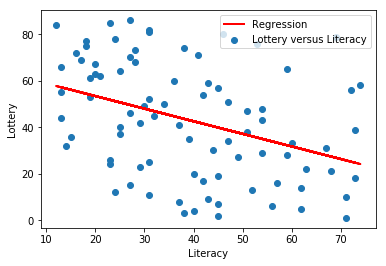

In [12]:
x = guerry['Literacy']
y_actual = guerry['Lottery']
y_expected = result.params['Intercept'] + result.params['Literacy'] * x

scatter(x=x, y=y_actual, label='Lottery versus Literacy')
plot(x, y_expected, color='red', linewidth=2, label='Regression')
xlabel('Literacy')
ylabel('Lottery')
legend(loc='best')

Separately, let us regress Lottery on Wealth (and not Literacy). So, we will use:

> Lottery ~ Wealth

In [13]:
y, X = dmatrices('Lottery ~ Wealth', data=guerry, return_type='dataframe')
model = sm.OLS(y, X) 
result = model.fit()
print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print
print 'p-values'
print result.pvalues

Params
Intercept    21.860207
Wealth        0.485929
dtype: float64

R-squared = 0.24318038465608705

p-values
Intercept    0.000014
Wealth       0.000002
dtype: float64


Lottery is positively associated with Wealth, but even this explains only 24% of the data variability.

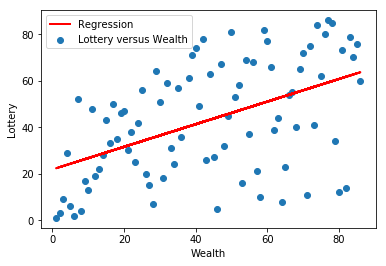

In [14]:
x = guerry['Wealth']
y_actual = guerry['Lottery']
y_expected = result.params['Intercept'] + result.params['Wealth'] * x

scatter(x=x, y=y_actual, label='Lottery versus Wealth')
plot(x, y_expected, color='red', linewidth=2, label='Regression')
xlabel('Wealth')
ylabel('Lottery')
legend(loc='best')

## Regressing on multiple variables

Predicting Lottery using either Literacy or Wealth only 14% and 24% of the data variability respectively. Perhaps we can do better using Literacy and Wealth both?

**Step 1:** Again we will build the design matrices, but we will specify the model as

> Lottery ~ Literacy + Wealth

This says: we want Lottery to be predicted as a linear combination (i.e., weighted sum) of Literacy and Wealth and an intercept.

In [15]:
# Step 1: Create design matrices
y, X = dmatrices('Lottery ~ Literacy + Wealth', data=guerry, return_type='dataframe')
y[:3]

,Lottery
1,41.0
2,38.0
3,66.0


In [16]:
X[:3]

,Intercept,Literacy,Wealth
1,1.0,37.0,73.0
2,1.0,51.0,22.0
3,1.0,13.0,61.0


**Step 2:** Run the regression.

In [17]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     18.32
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           2.66e-07
Time:                        21:11:02   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             760.3
Df Residuals:                      82   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.7979      7.873      5.055      0.0

In [18]:
result.params

Intercept    39.797879
Literacy     -0.378007
Wealth        0.413826
dtype: float64

So the regression model is:

> Lottery = 39.80 - 0.37 \* Literacy + 0.41 \* Wealth

Lottery is associated negatively with Literacy (as before), but positively with Wealth (again, as before).

Model | Literacy | Wealth | R-squared
----- | -------- | ------ | ---------
Lottery ~ Literacy | -0.54 | | 14%
Lottery ~ Wealth | | 0.48 | 24%
Lottery ~ Literacy + Wealth | -0.38 | 0.41 | 31%


Including more regressors (i.e., variables we can use for prediction) helped increase goodness of fit (R-squared).

In [19]:
result.pvalues

Intercept    0.000003
Literacy     0.006560
Wealth       0.000033
dtype: float64

The negative association with Literacy and the positive association with Wealth are both significant.

What do the predictions look like?

Recall that, with regression using just Literacy, we got

> Lottery = 64.24 - 0.54 * Literacy

and we have seen that this is the equation of a _line_.

Now, instead, we have

> Lottery = 39.80 - 0.37 \* Literacy + 0.41 \* Wealth

which is the equation of a _plane_.

Text(0.5,0,'Lottery')

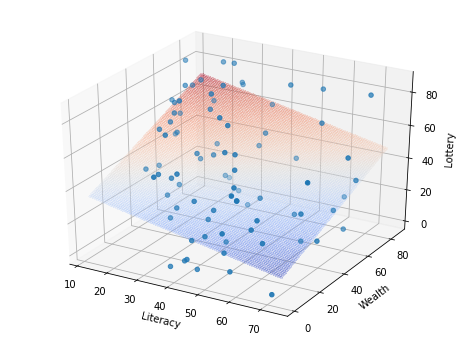

In [20]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(guerry['Literacy'].min(), guerry['Literacy'].max(), 100)
y = np.linspace(guerry['Wealth'].min(), guerry['Wealth'].max(), 100)
X, Y = np.meshgrid(x, y)
Z_expected = result.params['Intercept'] + result.params['Literacy'] * X + result.params['Wealth'] * Y


fig = plt.figure(figsize(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(guerry['Literacy'], guerry['Wealth'], guerry['Lottery'])
ax.plot_surface(X, Y, Z_expected, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.2)
ax.set_xlabel('Literacy')
ax.set_ylabel('Wealth')
ax.set_zlabel('Lottery')

Why a plane?

Suppose you are told the value of Literacy, say, Literacy = 5. Then,

    Lottery = 39.80 - 0.37 * Literacy + 0.41 * Wealth
            = 39.80 - 0.37 * 5 + 0.41 * Wealth
            = 37.95 + 0.41 * Wealth 

which we recognize as the equation of a line.

Suppose, instead, I told you that Literacy = 5.1 (instead of 5). We will find:

    Lottery = 37.91 + 0.41 * Wealth

With Literacy = 5.2, we get:

    Lottery = 37.87 + 0.41 * Wealth

So:

* We get a line for each possible value of Literacy
* All these lines have the _same_ slope for Wealth
* The only change is in the _intercept_
    * If Literacy changes only a little, the _intercept_ changes only a little
    * Change in intercept =  -0.37 \* change in Literacy

Let's plot a bunch of these lines and see.

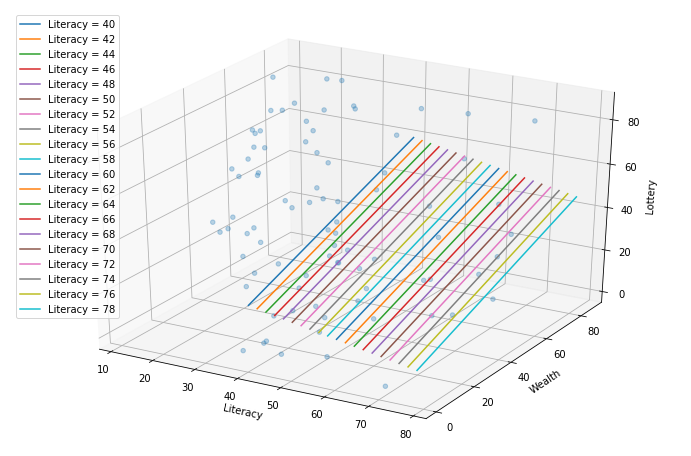

In [21]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(guerry['Literacy'], guerry['Wealth'], guerry['Lottery'], alpha=0.3)
ax.set_xlabel('Literacy')
ax.set_ylabel('Wealth')
ax.set_zlabel('Lottery')

wealth = np.linspace(guerry['Wealth'].min(), guerry['Wealth'].max(), 100) 
for val in range(40,80,2):
    literacy = np.ones(len(wealth)) * val
    lottery =  39.80 - 0.37 * literacy + 0.41 * wealth
    ax.plot(literacy, wealth, lottery, label='Literacy = {}'.format(val))
ax.legend(loc='best')


If we "stitch" these lines together, we'll end up with a plane.

## Regression using categorical variables

Until now, all variables were numbers (Lottery, Literacy, and Wealth). Suppose we believe the Region of France where a province is located can also help us predict interest in the lottery.

But Region is 'N', 'S', 'E', 'W', or 'C'. What does _slope_ of the Region variable mean?

Answer: one _dummy_ variable for each Region.

Python does this automatically for us when we specify

> Lottery ~ Literacy + Wealth + Region

In [22]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=guerry, return_type='dataframe')
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
1,1.0,1.0,0.0,0.0,0.0,37.0,73.0
2,1.0,0.0,1.0,0.0,0.0,51.0,22.0
3,1.0,0.0,0.0,0.0,0.0,13.0,61.0


**Observations**

* We have a column for each region (minus 'C')
    * If a province is from the North, the Region[T.N] column has a '1', while all other Region columns have a '0'.
* Why don't we have a dummy variable for Region='C'?

### Why don't we have a dummy variable for Region='C'?

Let's do a thought experiment. Suppose 'C' was the _only_ region. If we make a dummy variable Region[C], what will the model look like?

> Lottery = intercept + slope * Region[C]

But the dummy variable Region[C] is _always 1_. Hence, this model is essentially saying:

> Lottery = intercept + slope

But _intercept_ and _slope_ are both constants, so intercept + slope is some other constant.

> Lottery = constant

This is indistinguishable from

> Lottery = intercept

### Why don't we have a dummy variable for Region='C'?

So, if 'C' was the only Region, the model

> Lottery = intercept + slope * Region[C]

is the same as

> Lottery = intercept

as there is no way to tease apart intercept and slope.

### Why don't we have a dummy variable for Region='C'?

Now suppose there are only two Regions: 'N' and 'C'. Then, the model is:

> Lottery = intercept + slope_N \* Region[N] + slope_C \* Region[C]

But each province is either 'N' or 'C', which means

> Region[N] + Region[C] = 1, so

> Region[N] = 1 - Region[C]

Then the model becomes:

> Lottery = intercept + slope_N \* (1 - Region[C]) + slope_C \* Region[C]

or

> Lottery = (intercept + slope_N) + (slope_C - slope_N) * Region[C]

which cannot be distinguished from

> Lottery = intercept + slope * Region[C]

By a similar reasoning

* If we have five regions 'N', 'E', 'W', 'S', and 'C', then
* we only need four dummy variables

In [23]:
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
1,1.0,1.0,0.0,0.0,0.0,37.0,73.0
2,1.0,0.0,1.0,0.0,0.0,51.0,22.0
3,1.0,0.0,0.0,0.0,0.0,13.0,61.0


Now let us run the regression.

In [24]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sat, 04 Aug 2018   Prob (F-statistic):           1.07e-05
Time:                        21:11:07   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [25]:
result.rsquared

0.3379508691928822

Without Region in the model, we had R-squared of 31%; now it is 33%.

Worth it?

In [26]:
result.pvalues

Intercept      0.000105
Region[T.E]    0.116779
Region[T.N]    0.282713
Region[T.S]    0.533889
Region[T.W]    0.164786
Literacy       0.378495
Wealth         0.000035
dtype: float64

Notice something curious?

* The p-value of Literacy has suffered a lot
* The p-values of the various Regions are also quite poor

Essentially, we're hitting the limits of what we can infer from the data

In [27]:
len(guerry)

85

## What is important in advertising?

Data [here](http://www-bcf.usc.edu/~gareth/ISL/data.html).

In [28]:
advertising = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
advertising[:5]

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


We want to regress Sales on TV, Radio, and Newspaper.

In [29]:
y, X = dmatrices('sales ~ TV + radio + newspaper', data=advertising, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

R-squared = 0.8972106381789522
P-values
Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64


Observe that:

* R-squared is pretty good!
* All p-values are tiny (good fit!), except for Newspaper
* Newspaper has a slope of -0.001 with large p-value
    * Do we really need it?

Newspaper seems to make the results messy without adding much, so let's regress without it.

* The fewer the model parameters, the more understandable the model.

In [30]:
y, X = dmatrices('sales ~ TV + radio', data=advertising, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept    2.921100
TV           0.045755
radio        0.187994
dtype: float64

R-squared = 0.8971942610828957
P-values
Intercept    4.565557e-19
TV           5.436980e-82
radio        9.776972e-59
dtype: float64


**Observations:**

* Advertising on radio is more positively associated that advertising on TV (!)
* R-squared is just as high as before, as expected. Newspaper wasn't adding much.

Text(0.5,0,'sales')

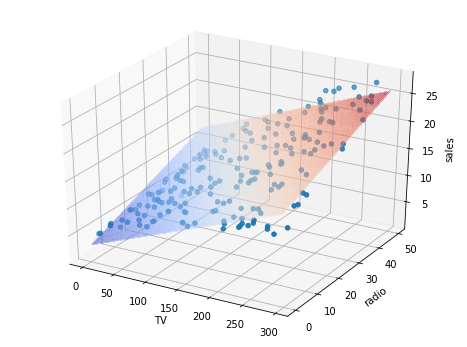

In [31]:
tv = advertising['TV']
radio = advertising['radio']
sales = advertising['sales']

x = np.linspace(tv.min(), tv.max(), 100)
y = np.linspace(radio.min(), radio.max(), 100)
X, Y = np.meshgrid(x, y)
Z_expected = result.params['Intercept'] + result.params['TV'] * X + result.params['radio'] * Y


fig = plt.figure(figsize(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tv, radio, sales)
ax.plot_surface(X, Y, Z_expected, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False, alpha=0.2)
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')

## Stock market 

Let us do this for several stock indices:

Index | Ticker
----- | ------
S&P 500 | SPY
NASDAQ | QQQ
Emerging Markets | EEM

In [34]:
from datetime import datetime
import pandas_datareader.data as web

start_date = datetime(2011, 1, 1) # January 1, 2011
end_date = datetime(2014, 1, 1)   # January 1, 2014

# Create a dictionary with 
#   key = ticker symbol
#   value = the Series of their daily closes
ticker_dict = {}
for idx, ticker in enumerate(['SPY', 'QQQ', 'EEM']):
    df_ticker = web.DataReader(ticker, 'yahoo', start_date, end_date) #.loc[ticker]
    ticker_dict[ticker] = df_ticker['Close']

# Create a DataFrame from all these
stocks = DataFrame(ticker_dict)
stocks[:10]

,EEM,QQQ,SPY
Date,,,
2011-01-03,48.099998,55.310001,127.050003
2011-01-04,48.320000,55.270000,126.980003
2011-01-05,48.200001,55.740002,127.639999
2011-01-06,47.689999,55.919998,127.389999
2011-01-07,47.250000,55.869999,127.139999
2011-01-10,46.759998,56.080002,126.980003
2011-01-11,47.259998,56.160000,127.430000
2011-01-12,48.209999,56.560001,128.580002
2011-01-13,47.790001,56.580002,128.369995


We want to predict tomorrow's **S&P 500** using today's **S&P 500, QQQ, and EEM.**

How do we create a column for tomorrow's **S&P 500**?

In [35]:
stocks['SPY_tomorrow'] = stocks['SPY'].shift(-1)
stocks[:5]

,EEM,QQQ,SPY,SPY_tomorrow
Date,,,,
2011-01-03,48.099998,55.310001,127.050003,126.980003
2011-01-04,48.320000,55.270000,126.980003,127.639999
2011-01-05,48.200001,55.740002,127.639999,127.389999
2011-01-06,47.689999,55.919998,127.389999,127.139999
2011-01-07,47.250000,55.869999,127.139999,126.980003


What do we do about the missing entry?

In [36]:
stocks.dropna(inplace=True)

In [37]:
y, X = dmatrices('SPY_tomorrow ~ SPY + QQQ + EEM', data=stocks, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept    2.455320
SPY          1.019050
QQQ         -0.041631
EEM         -0.056583
dtype: float64

R-squared = 0.9938432467062424
P-values
Intercept    0.005356
SPY          0.000000
QQQ          0.121121
EEM          0.002045
dtype: float64


Wait, what? We can predict so well?

Well, we are just predicting 

> tomorrow's SPY $\approx$ 1.018 * today's SPY. 

Not very useful...

In [38]:
stocks['SPY_percent_change'] = (stocks['SPY_tomorrow'] - stocks['SPY']) / stocks['SPY']
stocks[:5]

,EEM,QQQ,SPY,SPY_tomorrow,SPY_percent_change
Date,,,,,
2011-01-03,48.099998,55.310001,127.050003,126.980003,-0.000551
2011-01-04,48.320000,55.270000,126.980003,127.639999,0.005198
2011-01-05,48.200001,55.740002,127.639999,127.389999,-0.001959
2011-01-06,47.689999,55.919998,127.389999,127.139999,-0.001962
2011-01-07,47.250000,55.869999,127.139999,126.980003,-0.001258


In [39]:
y, X = dmatrices('SPY_percent_change ~ SPY + QQQ + EEM', data=stocks, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept    0.020664
SPY          0.000141
QQQ         -0.000327
EEM         -0.000449
dtype: float64

R-squared = 0.014017314484038312
P-values
Intercept    0.001975
SPY          0.151656
QQQ          0.108245
EEM          0.001237
dtype: float64


Poorer R-squared. Hard to predict...

## Factors affecting heart disease

Data may be found [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data).

In [40]:
heart = pd.read_csv('Regression_2_data/SAheart.data.txt', index_col=0)
heart[:5]

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


The variable we want to predict (the _"response variable"_) is "chd", which stands for chronic heart disease. The predictors include:

* medical circumstances: Systolic Blood Pressure (sbp), Cholesterol (ldl)
* tobacco: cumulative tobacco, in kg (!)
* alcohol: current consumption
* age: age on onset of disease

**Note:** The response variable (chd) is zero/one, which actually violates some of the theoretical conditions for linear regression, but still...

### Let's regress heart disease on some medical variables

In [41]:
y, X = dmatrices('chd ~ sbp + ldl + adiposity', data=heart, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept   -0.434205
sbp          0.002703
ldl          0.043083
adiposity    0.007968
dtype: float64

R-squared = 0.10472138183686952
P-values
Intercept    0.003158
sbp          0.014355
ldl          0.000162
adiposity    0.012735
dtype: float64


What's important?

* ldl, perhaps

### Heart disease regressed on family history

Family history (famhist) is either Absent or Present. What do we do for such categorical variables?

* We create dummy variables.

How many dummy variables?

* Two levels (Absent or Present), so one dummy variable

In [42]:
y, X = dmatrices('chd ~ famhist', data=heart, return_type='dataframe')
X[:3]

,Intercept,famhist[T.Present]
row.names,,
1,1.0,1.0
2,1.0,0.0
3,1.0,1.0


In [43]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept             0.237037
famhist[T.Present]    0.262963
dtype: float64

R-squared = 0.07418690213392187
P-values
Intercept             2.886599e-16
famhist[T.Present]    2.657629e-09
dtype: float64


So the regression is

    prediction = intercept + famhist[T.Present] * T.Present

What is the prediction when heart disease is present in the family history?

    prediction = intercept + famhist[T.Present] = 0.24 + 0.26 = 0.5

What is the prediction when heart disease is **not** present?

    prediction = intercept = 0.24

### Regress heart disease against consumption levels and obesity

In [44]:
y, X = dmatrices('chd ~ tobacco + alcohol + obesity', data=heart, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept    0.048481
tobacco      0.030245
alcohol      0.000013
obesity      0.007205
dtype: float64

R-squared = 0.09383335655640523
P-values
Intercept    7.154281e-01
tobacco      4.359995e-10
alcohol      9.881632e-01
obesity      1.558989e-01
dtype: float64


What's important?

* tobacco, perhaps

### What if we regressed on everything considered important until now?

In [45]:
y, X = dmatrices('chd ~ ldl + tobacco + age + famhist', data=heart, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model

print 'Params'
print result.params
print
print 'R-squared =', result.rsquared
print 'P-values'
print result.pvalues

Params
Intercept            -0.237407
famhist[T.Present]    0.178173
ldl                   0.032533
tobacco               0.017263
age                   0.006836
dtype: float64

R-squared = 0.21557002401621284
P-values
Intercept             0.000585
famhist[T.Present]    0.000021
ldl                   0.001334
tobacco               0.000373
age                   0.000024
dtype: float64


Notice R-squared is 21% now, while p-values are all pretty low.

* Combining the various factors helped.

While this gave some useful insights, linear regression is problematic here.

* Here, our response variable (i.e., the variable we are trying to predict) is _chd_
* _chd_ is either 0 and 1 (doesn't have chronic heart disease, or does).

* But our predictions are some real number
* Need not even be between 0 and 1
    * so we can't even interpret it as percentage chance of chronic heart disease.

Linear regression works best when the response variable is **continuous**.

* Sales
* Lottery levels
* Car Miles-per-gallon

How do we deal with the cases when the response variable is **categorical**?

* Heart disease or not
* Survey responses
    * _"Did you evacuate your home when the hurricane hit?"_
        * Yes
        * No
        * Don't know
        * Refused to answer

* **Logistic Regression** ==> to be seen later.